# WRI363: Madhav Ajayamohan's Data Story– An Exploration of Data on Expatriate Keralite's in Abu Dhabi Before and During the COVID-19 Pandemic

Allow me to introduce myself– my name is Madhav Ajayamohan. In my class WRI363: Communicating in a World of Data, we learn how to represent data in an accessible way. I will be analyzing the unique dataset of Expatriate Keralies from Abu Dhabi. Allow me to give you some context.

## The Background Information

The United Arab Emirates (UAE) is home to a large portion of Keralite (people from the southern state of Kerala) expatriates. As of 2008, 41.9% of all Keralite emigrants reside in the UAE (Prakash). They have developed a unique community in the country by creating “a subculture of their own” (Rajeev). This community is an integral part of the Kerala economy.

In the last half century, “the factor which has had the greatest impact upon [Kerala’s] economy especially on labour market, consumption, savings, investment, poverty, income distribution, and economic change… has been the migration to the Gulf and migrant remittances” (Prakash). In 2008, the total amount of remittances that flowed into Kerala was equal to 10.4 billion USD, and it made up 30.7% of Kerala’s GDP (Rajan and Zachariah). These remittances have played a large role in Kerala’s high Human Development Index. The large influx of income promotes higher levels of education and health, besides reducing poverty (Rajan and Zachariah).

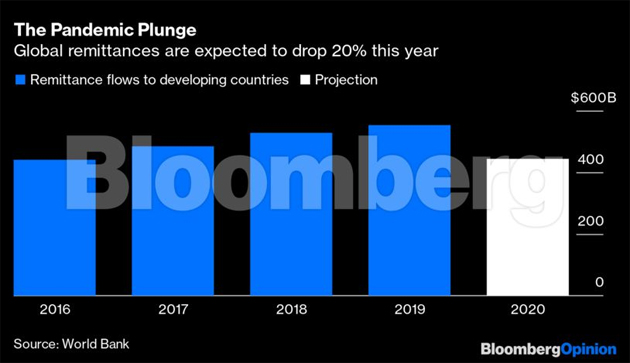


**Fig.1 Graph on remittances to India (Ghosh)**

However, the Covid-19 pandemic significantly decreased the volume of remittances that flowed into India during the pandemic. India is estimated to suffer a 22% decline in remittances (Fig.1), as a result of decreased wages and job loss. A study indicates that out of the 869,630 expatriates who returned to Kerala, 65.2% cited job loss as the reason to return (“COVID-19 Impact”). Most expatriates have suffered “pay cuts, unpaid leave and [job] uncertainty” (Cherian and Kumar).

So, the question I want to investigate is

**Did the pandemic decrease Keralite's propensity to save? Or did they maintain their propensity to save, despite the lower economic situations?**


## My Counter Data Piece: The Entire Jupyter Notebook

Caption: A Jupyter Notebook that shows an anlysis of a dataset of Expatriate Keralite's Before and During the COVID-19 Pandemic. It includes the code to analyze data, how to code works, and specific graphs on the topic.

Explanation: My Counter Data Piece is this entire notebook– this whole piece should be viewed as counter data. Counter data resists typical practices for collecting, managing, analyzing, and using data. In most cases, stastics and visualizations shown to the general public does not include reasoning as to how those stastics and visualizations were produced. However, in this Jupyter Notebook, I explain to the reader how I cleaned the data, why I made the decisions I did, and how I get to each step of the process. The very reason I chose a Jupyter Notebook is to give reader's an intimate look into what assumptions I make during data collection, cleaning, and analysis.

## The Cleaning Process

### Initial Data Representation

Let us first take a look at the dataset we will working with:

In [142]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The code above isn't important– but it connects a Google Colab Notebook with Google drive. It's not important to the data analysis process, but if you are interested

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
from scipy.stats import linregress

The code above imports important coding libraries used for data analysis. Libraries contain methods that are already programmed for you– so I don't need to hardcode every single method from scratch. I'll explain each library as they come up.

In [144]:
all_df = pd.read_csv("/content/The Google Form Data - Form Responses 1.csv")

Here we use the Pandas Library to get the dataset we will be using. This data is stored in what we call a dataframe. A dataframe is something that makes it easier to work with data– it looks like a table. Here's is some infromation on our data set, and the first few lines of our dataset:

In [145]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 29 columns):
 #   Column                                                                                                                                                                                                         Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                         --------------  ----- 
 0   Timestamp                                                                                                                                                                                                      204 non-null    object
 1   What is your profession?                                                                                                                                                                 

In [146]:
all_df.head()

,Timestamp,What is your profession?,Please indicate your gender,BEFORE the Covid-19 pandemic (before March 1st 2020)?,"DURING the Covid-19 pandemic (during March 1st to August 31st, 2020)?",BEFORE the Covid-19 pandemic (before March 1st 2020)?.1,"DURING the Covid-19 pandemic (during March 1st to August 31st, 2020)?.1",How many people in Kerala do you financially support with your income?,How important is it for you to send money back to Kerala?,I send money to Kerala:,...,Fruits and Vegetables,"PREPARED MEALS (Prepared Meals are items like Cup noodles, Heat & eat items like packaged curries, Maggi, Frozen chapati/paratha, Khubhus, Readymade idli/ appam batter, Restaurant take away/dine in, etc)","SWEETS AND SNACKS (Sweets and Snacks are items like Bakery items, Ice-cream, Chocolates, etc)","PERSONAL CARE AND EFFECTS (Personal Care and Effects are items like Clothing, Footwear, Ornaments, Soap, Visiting Barber/beautician, etc)","HOUSING RELATED EXPENDITURES (Housing Related expenditures are expenses like Housing Rent, Electricity Bill, Water Bill, etc)","HEALTHCARE (Healthcare includes expenses like Medicine fees, Doctor’s fees, Purchasing of medical equipment, Homeo medicines, etc)","TRANSPORTATION EXPENSES (Transportation expenses include expenses like Bus fare, Taxi fare, Petrol/Diesel costs, airplane fare, etc)","COMMUNICATION EXPENSES (Communication Expenses include expenses like Phone bills, Postage expenses, Internet expenses, etc)","RECREATION AND AMUSEMENT (Recreation and Amusement includes expenses like Cable connection fees, Newspapers, Playing Cards, carrom boards, etc)","HOUSEHOLD GOODS AND SERVICES (Household Goods and Services include items like Furniture, Bedding, Appliances like TV, Fridge, Washing machine, Stove, et cetera)"
0,7/22/2021 17:11:36,Administrative Clerk,Female,"5,001-10,000 AED","5,001-10,000 AED","Housing, Transportation (Bus pass, fuel, etc)","Housing, Transportation (Bus pass, fuel, etc)",0,Unimportant (Family can support basic necessit...,"To save/invest money (to build a home, deposit...",...,Highly increased (by more than 50 AED),Highly increased (by more than 50 AED),Highly increased (by more than 50 AED),Highly increased (by more than 50 AED),No change,No change,Highly decreased (by more than 50 AED),Highly increased (by more than 50 AED),Highly increased (by more than 50 AED),No change
1,7/22/2021 17:46:12,Administrative assistant,Male,"10,001-15,000 AED","10,001-15,000 AED","Housing, Healthcare, Transportation (Buss pass...","Housing, Healthcare, Transportation (Buss pass...",4,Important (Family has some income but depends ...,Both,...,Slightly Increased (by 1 -50 AED),Slightly Increased (by 1 -50 AED),Slightly Increased (by 1 -50 AED),Slightly Increased (by 1 -50 AED),No change,Highly increased (by more than 100 AED),Highly increased (by more than 50 AED),Highly increased (by more than 50 AED),No change,No change
2,7/22/2021 19:52:30,Accountant,Female,"15,001-20,000 AED","15,001-20,000 AED",NaN,NaN,4,Unimportant (Family can support basic necessit...,Both,...,Highly increased (by more than 50 AED),Slightly Increased (by 1 -50 AED),Highly decreased (by more than 50 AED),Highly decreased (by more than 50 AED),Slightly Increased (by 1 -500 AED),No change,Highly decreased (by more than 50 AED),Highly increased (by more than 50 AED),No change,Highly decreased (by more than 500 AED)
3,7/22/2021 19:59:17,Accountant,Female,"15,001-20,000 AED","15,001-20,000 AED",NaN,NaN,4,Unimportant (Family can support basic necessit...,Both,...,Highly increased (by more than 50 AED),Slightly Increased (by 1 -50 AED),Highly decreased (by more than 50 AED),Highly decreased (by more than 50 AED),Slightly Increased (by 1 -500 AED),No change,Highly decreased (by more than 50 AED),Highly increased (by more than 50 AED),No change,Highly decreased (by more than 500 AED)
4,7/22/2021 20:00:46,Marketing executive,Male,"10,001-15,000 AED",NaN,"Healthcare, Transportation (Buss pass, fuel, etc)","Healthcare, Transportation 

Now, lets start talking about the dataset in question. I actually personally collected the data above by myself.

In 2020, I did a survey of expatriate Keralites in Abu Dhabi. I sent out an online questionnaire of data with Google Forms with multiple questions.

I collected the data using Snowball Sampling– so I send the survey to some people, and those people send it to other people, and so on and so forth. I chose this survey method... because no other survey method would make sense for me. I was a high schooler– I had no way to actually reach out to people with more respected methods of data collection such as a random sample (choosing random keralite expatriates from a set of all expatriates).

But, this method of data collection is a form of counter data. I am giving the Keralite expatriate population more control over the data on themselves– so this might actually be better.

The paper-copies of the survey's I sent out is attached as an Appendices in my GitHub– so feel free to check it out. In this data analysis I will not work with every piece of information. I will only focus on a few, important points of data:



1.   Income Level Before/During the Pandemic

2.   The Number of People They Support in Kerala with their Income

3.   Importance of Sending Money back to Kerala for their Family

4.   Remmitance Habits based on the Exhange Rate between INR and AED

6.   Percentage of Income Saved Before/During the Pandmic

7.   Percentage of Money Sent to Kerala Before/During the Pandemic


*As a side note, please note that Before the Pandemic is viewed as the time period before March 1st, 2020. During the Panemic is viewed as the time period in-between March 1st to August 31st, 2020.*


In [147]:
main_df = pd.DataFrame() # The main dataframe I will use for this investigation
main_df["Income Before Pandemic"] = all_df.iloc[:, 3]
# Data on Income Level Before Pandemic

main_df["Income During Pandemic"] = all_df.iloc[:, 4]
# Data on Income Level During the Pandemic

main_df["People Supporting in Kerala"] = all_df.iloc[:, 7]
# Data on People Supported in Kerala by the Expatriate

main_df["Importance"] = all_df.iloc[:, 8]
# Data on how Important it is to send money back to family members

main_df["Exchange Rate"] = all_df.iloc[:, 10]
# Data on Behavior based on Exchange Rate

main_df["Percentage Saved Before"] = all_df.iloc[:, 12]
# Percentage of Income Saved Before the Pandemic

main_df["Percentage Saved During"] = all_df.iloc[:, 13]
# Percentage of Income Saved dURING the Pandemic

main_df["Percentage Sent to Kerala Before"] = all_df.iloc[:, 14]
# Percentage of Money Sent to Kerala Before the Pandemic

main_df["Percentage Sent to Kerala During"] = all_df.iloc[:, 15]
# Percentage of Money Sent to Kerala Before the Pandemic

main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Income Before Pandemic            202 non-null    object
 1   Income During Pandemic            200 non-null    object
 2   People Supporting in Kerala       196 non-null    object
 3   Importance                        204 non-null    object
 4   Exchange Rate                     204 non-null    object
 5   Percentage Saved Before           204 non-null    object
 6   Percentage Saved During           204 non-null    object
 7   Percentage Sent to Kerala Before  204 non-null    object
 8   Percentage Sent to Kerala During  204 non-null    object
dtypes: object(9)
memory usage: 15.0+ KB


In [148]:
main_df.head()

,Income Before Pandemic,Income During Pandemic,People Supporting in Kerala,Importance,Exchange Rate,Percentage Saved Before,Percentage Saved During,Percentage Sent to Kerala Before,Percentage Sent to Kerala During
0,"5,001-10,000 AED","5,001-10,000 AED",0,Unimportant (Family can support basic necessit...,I send more money to my family in Kerala,80,80,80,80
1,"10,001-15,000 AED","10,001-15,000 AED",4,Important (Family has some income but depends ...,I send more money to my family in Kerala,50,50,50,50
2,"15,001-20,000 AED","15,001-20,000 AED",4,Unimportant (Family can support basic necessit...,I send more money to my family in Kerala,10 percent,20-30%,20%,30-40%
3,"15,001-20,000 AED","15,001-20,000 AED",4,Unimportant (Family can support basic necessit...,I send more money to my family in Kerala,10 percent,20-30%,20%,30-40%
4,"10,001-15,000 AED",NaN,2,Unimportant (Family can support basic necessit...,I send more money to my family in Kerala,25,25,10,5


The main_df is the data frame that contains most of the data that we are working with. Now, we need to clean the data in each column. So, let's go through it.

### Income Before/During the Pandemic

In my survey, we collected information on respondent income by asking them if they were in one of the following monthly income levels:

1. 0 - 2,500 AED
2. 2,500 - 5,000 AED
3. 5,001- 10,000 AED
4. 10,001 - 15,000 AED
5. 15,001 - 20,000 AED
6. 20,001- 25,000 AED
7. 25,001- 30,000 AED
8. 30,001- 35,000 AED
9. 35,001- 40,000 AED
10. Greater than 40,000 AED

Infromation on income gained this way is weaker– specific information on income would be much better. However, this was to secure the privacy of the respondents– even though the survey was anonymous, people would still hesitate to share information on income. So, I chose income ranges.

You may also notice that every income range is not equal in size. The first two are intervals of 2500 and the rest are in intervals of 5000.

I made this descion because there is more variability in the the lower income ranges. Many Keralite expatrates are blue collar workers with low salaries– these low ranges are necessary to capture their change in come from before to during the pandemic.

However, the more income you have, the less variability– so we used larger ranges.

I will replace each income range with the median income in that range so I get all integer values– the median income is used an approximate for each respondents income.

For "Greater than 40,000 AED" I will replace it with 45,000. This may be inaccurate, but in the survey only 3 people chose this category– and two of them left this category during the pandemic. So, this should be fine.

You may be curious as to why I want to make everything an integer– or a number. In this data analyssi project, I want to do quantitative data analysis. In order to do that, I need numbers for every field. That's why we are focusing on cleaning the data like this.

In [149]:
main_df.dropna(inplace=True)
# This removes all records (rows) with any null value somewhere
# I am choosing to do this to not deal with any weird records without full information

replace_dict = {'0-2,500 AED':1250, '2,500-5,000 AED':3750, '5,001-10,000 AED':7500,
                '10,001-15,000 AED':12500, '15,001-20,000 AED':17500, '20,001-25,000 AED': 22500,
                '25,001-30,000 AED':27500, '30,001-35,000 AED':32500, '35,001-40,000 AED': 37500,
                'Greater than 40,000 AED': 45000}

main_df.replace({'Income Before Pandemic': replace_dict, 'Income During Pandemic': replace_dict}, inplace=True)
main_df['Income Before Pandemic'].replace('15,001-20,000 AED\t\t', 17500, inplace=True)
main_df['Income During Pandemic'].replace('5,001-10,000 AED\t\t', 17500, inplace=True)

main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 0 to 203
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Income Before Pandemic            192 non-null    int64 
 1   Income During Pandemic            192 non-null    int64 
 2   People Supporting in Kerala       192 non-null    object
 3   Importance                        192 non-null    object
 4   Exchange Rate                     192 non-null    object
 5   Percentage Saved Before           192 non-null    object
 6   Percentage Saved During           192 non-null    object
 7   Percentage Sent to Kerala Before  192 non-null    object
 8   Percentage Sent to Kerala During  192 non-null    object
dtypes: int64(2), object(7)
memory usage: 15.0+ KB


<ipython-input-149-7abb98f98a5c>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_df['Income Before Pandemic'].replace('15,001-20,000 AED\t\t', 17500, inplace=True)
<ipython-input-149-7abb98f98a5c>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  main_df['Income Before Pandemic'].replace('15,

Thus, we have now replaced every value in the "Income Before Pandemic" and "Income During Pandemic" with integers, as needed. We can tell with the int64 Dtype– which just tells us the column has the type int, as needed.

### People Supported in Kerala

This is a relatively simple column to clean. The data can naturally be presented as integers– the only issue is that there are some non-number answers in the responses. So, we need to fix them.

In [150]:
main_df["People Supporting in Kerala"].value_counts()

,count
People Supporting in Kerala,
4,36
5,31
2,23
3,16
0,12
1,10
7,6
6,6
10,6


The above is table of all the responses, and how many times they appear. In these responses, some of the non-number responses are acceptable– like "Two" or "Ten". But some responses can't be used– like "Only my Family" of "Some Communities". So we will delete the values we can't use, and replace the others with the appropriate number.

In [151]:
removal_str = "Only my family|As much as i can|Lessthan  5000 only.|Some communities|More than10|2 family|My family|More than 13|Family|Below 6|0 in Kerala but 3 in Abu Dhabi"

main_df["People Supporting in Kerala"].replace(['My family (4 people)', 'Four', '4'], 4, inplace=True)

main_df = main_df[~main_df['People Supporting in Kerala'].str.contains(removal_str, case=False, na=False)]

main_df["People Supporting in Kerala"].replace(['O', 'No', 'Nil', 'Nothing', 'None', 'None ',  'Nobody', 'Nobody ', '0'], 0, inplace=True)

main_df["People Supporting in Kerala"].replace(['Two', 'Two ', '2'], 2, inplace=True)

main_df["People Supporting in Kerala"].replace(['One', '1'], 1, inplace=True)

main_df["People Supporting in Kerala"].replace(['Ten', 'Around 10', '10'], 10, inplace=True)

main_df["People Supporting in Kerala"].replace(['5 people ', '5'], 5, inplace=True)

main_df["People Supporting in Kerala"].replace(['Three.', '3'], 3, inplace=True)

main_df["People Supporting in Kerala"].replace(['6 members', '6'], 6, inplace=True)

main_df["People Supporting in Kerala"] = main_df["People Supporting in Kerala"].astype('int')

main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 0 to 203
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Income Before Pandemic            179 non-null    int64 
 1   Income During Pandemic            179 non-null    int64 
 2   People Supporting in Kerala       179 non-null    int64 
 3   Importance                        179 non-null    object
 4   Exchange Rate                     179 non-null    object
 5   Percentage Saved Before           179 non-null    object
 6   Percentage Saved During           179 non-null    object
 7   Percentage Sent to Kerala Before  179 non-null    object
 8   Percentage Sent to Kerala During  179 non-null    object
dtypes: int64(3), object(6)
memory usage: 14.0+ KB


<ipython-input-151-e79f497279eb>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_df["People Supporting in Kerala"].replace(['My family (4 people)', 'Four', '4'], 4, inplace=True)
<ipython-input-151-e79f497279eb>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

Thus, we have cleaned the third column.

### Importance

The data related to this column comes from the responses to the question: **How important is it for you to send money back to Kerala?** The respondents were given a choice of 4 possible options for the question:

1. Very Important (Family is totally dependent on my remittances)
2. Important (Family has some income but depends on my remittance to pull through)
3. Unimportant (Family can support basic necessities even without my remittance)
4. Very Unimportant (Family is capable to live without my remittances)

This is what we call a categorical variable– we have four different categories that we need to deal with. In this case, we need to somehow convert these categories into numbers.

What's nice about this category is that there is a clear natural order in these categories– loosely speaking very unimportant is less than unimportant, which is less than important. In other words, we can order these categories based on grade of importance.

So, we can use a technique called "ordinal mapping": we do the following conversion:

1. Very Unimportant -> Becomes 1
2. Unimportant -> Becomes 2
3. Important -> Becomes 3
4. Very Important -> Becomes 4

This mapping preserves the natural order between categories– very important is reprewsnted as more important that unimportant because 4 > 2. So, that's what we'll do.

In [152]:
replace_dict = {"Very Unimportant (Family is capable to live without my remittances)": 1,
                "Unimportant (Family can support basic necessities even without my remittance)": 2,
                "Important (Family has some income but depends on my remittance to pull through)": 3,
                "Very Important (Family is totally dependent on my remittances)": 4}

main_df.replace({'Importance': replace_dict}, inplace=True)

<ipython-input-152-92ea447e0fc2>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  main_df.replace({'Importance': replace_dict}, inplace=True)
<ipython-input-152-92ea447e0fc2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df.replace({'Importance': replace_dict}, inplace=True)


In [153]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 0 to 203
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Income Before Pandemic            179 non-null    int64 
 1   Income During Pandemic            179 non-null    int64 
 2   People Supporting in Kerala       179 non-null    int64 
 3   Importance                        179 non-null    int64 
 4   Exchange Rate                     179 non-null    object
 5   Percentage Saved Before           179 non-null    object
 6   Percentage Saved During           179 non-null    object
 7   Percentage Sent to Kerala Before  179 non-null    object
 8   Percentage Sent to Kerala During  179 non-null    object
dtypes: int64(4), object(5)
memory usage: 14.0+ KB


### Exchange Rate

The question related to this column is "When the exchange rate is high (1 AED yields more INR):", and the three options given to the respondent is:

1. I send more money to Kerala
2. The amount I send does not change
3. I send less money to Kerala

This is very similar to the prior categorical variable– there is a natural order to these categories. So, we do some more ordinal mapping. Specifically,

1. I send less money to Kerala -> Becomes 1
2. The amount I send does not change -> Becomes 2
3. I send more money to Kerala -> Becomes 3

In [154]:
replace_dict = {"I send less money to my family in Kerala": 1,
                "The amount I send to Kerala does not change": 2,
                "I send more money to Kerala": 3,
                "I send more money to my family in Kerala": 3,
                "The amount I send to my family in Kerala does not change": 2,
                "I send less money to Kerala": 1}

main_df.replace({'Exchange Rate': replace_dict}, inplace=True)
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 0 to 203
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Income Before Pandemic            179 non-null    int64 
 1   Income During Pandemic            179 non-null    int64 
 2   People Supporting in Kerala       179 non-null    int64 
 3   Importance                        179 non-null    int64 
 4   Exchange Rate                     179 non-null    int64 
 5   Percentage Saved Before           179 non-null    object
 6   Percentage Saved During           179 non-null    object
 7   Percentage Sent to Kerala Before  179 non-null    object
 8   Percentage Sent to Kerala During  179 non-null    object
dtypes: int64(5), object(4)
memory usage: 14.0+ KB


<ipython-input-154-8b0d2304df34>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  main_df.replace({'Exchange Rate': replace_dict}, inplace=True)
<ipython-input-154-8b0d2304df34>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df.replace({'Exchange Rate': replace_dict}, inplace=True)


### Percentage Saved Before/During the Pandemic

This is our dependent variable– the main variable that we care about. This will tells us about the savings tendancies of expatriate Keralites. This is basically given to us in numeric format– all we need to do is deal with all the incorrectly formatted responses.

In [155]:
pd.set_option('display.max_rows', None)
main_df['Percentage Saved Before'].value_counts()

,count
Percentage Saved Before,
50,19
30,12
10,10
0,8
50%,8
25,7
20,6
Nothing,5
5,5


Most of these responses we can keep- but some we need to delete. Like "Don't know" nad "Room rent and other small expenses."

Also, responses that give us specific numbers greater than 100 can't be utilized either. In some cases, we don't know if it represents a specific amount of money sent in INR or AED. In the cases where they are specified, we can estimate the percentage saved based off of their median income range.

For percentile ranges, we will choose the median percentage– similar to the income ranges.

In [157]:
removal_str = "Yes|1000|500|2000|2500|20000|Good|10,000|5000|Room rent and other small expenses|40,000|1500|Small income|Don't know|50,000"
main_df = main_df[~main_df['Percentage Saved Before'].str.contains(removal_str, case=False, na=False)]

main_df['Percentage Saved Before'].replace(['50', '50%', '50 %', '50 percentage', '50 percentage ', '50 percent '], 50, inplace=True)
main_df['Percentage Saved Before'].replace(['30', '30%', '25-35%'], 30, inplace=True)
main_df['Percentage Saved Before'].replace(['10', '10%', '10 percent', "10 %", "Ten"], 10, inplace=True)
main_df['Percentage Saved Before'].replace(['0', 'Nothing ', 'Nothing', 'Nil', "0%", "No savings "], 0, inplace=True)
main_df['Percentage Saved Before'].replace(['25', '25%'], 25, inplace=True)
main_df['Percentage Saved Before'].replace(['20', '20%'], 20, inplace=True)
main_df['Percentage Saved Before'].replace(['40', '40%'], 40, inplace=True)
main_df['Percentage Saved Before'].replace(['60', '60%'], 60, inplace=True)
main_df['Percentage Saved Before'].replace(['75', '75%', '75 %'], 75, inplace=True)
main_df['Percentage Saved Before'].replace(['80%', '80', ], 80, inplace=True)
main_df['Percentage Saved Before'].replace(['90', "90%"], 90, inplace=True)
main_df['Percentage Saved Before'].replace(['3-5'], 4, inplace=True)
main_df['Percentage Saved Before'].replace(['15', '15%'], 15, inplace=True)
main_df['Percentage Saved Before'].replace(['35', '35%', '30- 40 '], 35, inplace=True)
main_df['Percentage Saved Before'].replace(['65%'], 65, inplace=True)
main_df['Percentage Saved Before'].replace(['50 to 60'], 55, inplace=True)
main_df['Percentage Saved Before'].replace(['200 AED'], 16, inplace=True)
main_df['Percentage Saved Before'].replace(['20,000 INR'], 22, inplace=True)

main_df['Percentage Saved Before'] = main_df['Percentage Saved Before'].astype('int')

main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 0 to 203
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Income Before Pandemic            159 non-null    int64 
 1   Income During Pandemic            159 non-null    int64 
 2   People Supporting in Kerala       159 non-null    int64 
 3   Importance                        159 non-null    int64 
 4   Exchange Rate                     159 non-null    int64 
 5   Percentage Saved Before           159 non-null    int64 
 6   Percentage Saved During           159 non-null    object
 7   Percentage Sent to Kerala Before  159 non-null    object
 8   Percentage Sent to Kerala During  159 non-null    object
dtypes: int64(6), object(3)
memory usage: 12.4+ KB


<ipython-input-157-aed1fa57fe47>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_df['Percentage Saved Before'].replace(['50', '50%', '50 %', '50 percentage', '50 percentage ', '50 percent '], 50, inplace=True)


Now, we do the same thing for the Percentage Saved During the Pandemic

In [ ]:
main_df['Percentage Saved During'].value_counts()

In [170]:
main_df['Percentage Saved During'].replace(['50', '50%', '50 %', '50 percentage', '50 percentage ', '50 percent '], 50, inplace=True)
main_df['Percentage Saved During'].replace(['30', '30%', '25-35%'], 30, inplace=True)
main_df['Percentage Saved During'].replace(['10', '10%', '10 percent', "10 %", "Ten"], 10, inplace=True)
main_df['Percentage Saved During'].replace(['0', 'Nothing ', 'Nothing', 'Nil', "0%", "No savings ", "No savings"], 0, inplace=True)
main_df['Percentage Saved During'].replace(['25', '25%', '20-30%'], 25, inplace=True)
main_df['Percentage Saved During'].replace(['20', '20%', '20 percentage '], 20, inplace=True)
main_df['Percentage Saved During'].replace(['40', '40%', "40 %"], 40, inplace=True)
main_df['Percentage Saved During'].replace(['60', '60%'], 60, inplace=True)
main_df['Percentage Saved During'].replace(['70%'], 70, inplace=True)
main_df['Percentage Saved During'].replace(['75', '75%', '75 %'], 75, inplace=True)
main_df['Percentage Saved During'].replace(['80%', '80', ], 80, inplace=True)
main_df['Percentage Saved During'].replace(['90', "90%"], 90, inplace=True)
main_df['Percentage Saved During'].replace(['3-5'], 4, inplace=True)
main_df['Percentage Saved During'].replace(['15', '15%'], 15, inplace=True)
main_df['Percentage Saved During'].replace(['35', '35%', '30- 40 ', '30- 40'], 35, inplace=True)
main_df['Percentage Saved During'].replace(['65%', "60 to 70"], 65, inplace=True)
main_df['Percentage Saved During'].replace(['50 to 60'], 55, inplace=True)
main_df['Percentage Saved During'].replace(['5%', '5 %'], 5, inplace=True)
main_df['Percentage Saved During'].replace(['40-50%'], 45, inplace=True)
main_df.replace(['200 AED'], 16, inplace=True)
# main_df.replace(['20,000 INR'], 22, inplace=True)

main_df['Percentage Saved During'] = main_df['Percentage Saved During'].astype('int')

main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 0 to 203
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Income Before Pandemic            159 non-null    int64 
 1   Income During Pandemic            159 non-null    int64 
 2   People Supporting in Kerala       159 non-null    int64 
 3   Importance                        159 non-null    int64 
 4   Exchange Rate                     159 non-null    int64 
 5   Percentage Saved Before           159 non-null    int64 
 6   Percentage Saved During           159 non-null    int64 
 7   Percentage Sent to Kerala Before  159 non-null    object
 8   Percentage Sent to Kerala During  159 non-null    object
dtypes: int64(7), object(2)
memory usage: 12.4+ KB


<ipython-input-170-8b5f909c64bf>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_df['Percentage Saved During'].replace(['50', '50%', '50 %', '50 percentage', '50 percentage ', '50 percent '], 50, inplace=True)
<ipython-input-170-8b5f909c64bf>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

### Percentage Sent to Kerala Before/During the Pandemic

This is also a dependent variable– similar to percentage of money saved. We cannot equate money saved as money sent to Kerala. If the money sent to Kerala is used for purposes like paying school tuitions, constructing houses and et cetera it may not be considered as savings. So, this variable records the money sent to Kerala

In [172]:
main_df['Percentage Sent to Kerala Before'].value_counts()

,count
Percentage Sent to Kerala Before,
30,14
50,11
10,10
20,9
20%,8
40,7
10%,6
50%,6
60,5


In [194]:
removal_str = "30000|30,000|60000100000|5000|"

# main_df = main_df[~main_df['Percentage Sent to Kerala Before'].str.contains(removal_str, case=False, na=False)]

main_df['Percentage Sent to Kerala Before'].replace(['50', '50%', '50 %', '50 percentage', '50 percentage ', '50 percent ', '50©'], 50, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['30', '30%', '25-35%', 'Thirty'], 30, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['10', '10%', '10 percent', "10 %", "Ten"], 10, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['0', 'Nothing ', 'Nothing', 'Nil', "0%", "No savings ", "No savings"], 0, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['25', '25%', '20-30%'], 25, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['20', '20%', '20 percentage ', "20 %"], 20, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['40', '40%', "40 %"], 40, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['60', '60%'], 60, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['70%'], 70, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['75', '75%', '75 %'], 75, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['80%', '80', ], 80, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['90', "90%"], 90, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['3-5'], 4, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['15', '15%'], 15, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['35', '35%', '30- 40 ', '30- 40'], 35, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['65%', "60 to 70"], 65, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['50 to 60'], 55, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['5%', '5 %'], 5, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['40-50%'], 45, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['0.01%'], 0.01, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['72%'], 72, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['68%'], 68, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['85%'], 85, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['5 to 10'], 7.5, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['85-90 percentage'], 87.5, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['13,000 INR'], 7, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['Monthly 1000 aed'], 13, inplace=True)

main_df['Percentage Sent to Kerala Before'] = main_df['Percentage Sent to Kerala Before'].astype('int')
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154 entries, 0 to 203
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Income Before Pandemic            154 non-null    int64 
 1   Income During Pandemic            154 non-null    int64 
 2   People Supporting in Kerala       154 non-null    int64 
 3   Importance                        154 non-null    int64 
 4   Exchange Rate                     154 non-null    int64 
 5   Percentage Saved Before           154 non-null    int64 
 6   Percentage Saved During           154 non-null    int64 
 7   Percentage Sent to Kerala Before  154 non-null    int64 
 8   Percentage Sent to Kerala During  154 non-null    object
dtypes: int64(8), object(1)
memory usage: 12.0+ KB


Now, we do the same think for Percentage of Money Sent to Kerala During the Pandemic:

In [188]:
main_df['Percentage Sent to Kerala During'].value_counts()

,count
Percentage Sent to Kerala During,
10,12
30,12
20%,8
0,8
50,7
40,7
70,7
20,6
Nil,5


In [201]:
removal_str = "30000|30,000|60000|100000|%|5000"

main_df = main_df[~main_df['Percentage Sent to Kerala During'].str.contains(removal_str, case=False, na=False)]

main_df['Percentage Sent to Kerala During'].replace(['50', '50%', '50 %', '50 percentage', '50 percentage ', '50 percent ', '50©'], 50, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['30', '30%', '25-35%', 'Thirty'], 30, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['10', '10%', '10 percent', "10 %", "Ten"], 10, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['0', 'Nothing ', 'Nothing', 'Nil', "0%", "No savings ", "No savings"], 0, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['25', '25%', '20-30%', 'Twenty five'], 25, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['20', '20%', '20 percentage ', "20 %"], 20, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['40', '40%', "40 %"], 40, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['60', '60%', '60 %'], 60, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['70%'], 70, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['75', '75%', '75 %'], 75, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['80%', '80', ], 80, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['90', "90%"], 90, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['3-5'], 4, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['15', '15%'], 15, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['35', '35%', '30- 40 ', '30- 40', '30-40%'], 35, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['65%', "60 to 70"], 65, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['50 to 60'], 55, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['5%', '5 %'], 5, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['40-50%'], 45, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['0.01%'], 0.01, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['72%'], 72, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['68%'], 68, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['85%'], 85, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['5 to 10'], 7.5, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['85-90 percentage', '85-90parcentage'], 87.5, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['25- 30 '], 27.5, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['10,000 INR'], 7, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['500 aed'], 11, inplace=True)

main_df['Percentage Sent to Kerala During'] = main_df['Percentage Sent to Kerala During'].astype('int')
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 203
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Income Before Pandemic            150 non-null    int64
 1   Income During Pandemic            150 non-null    int64
 2   People Supporting in Kerala       150 non-null    int64
 3   Importance                        150 non-null    int64
 4   Exchange Rate                     150 non-null    int64
 5   Percentage Saved Before           150 non-null    int64
 6   Percentage Saved During           150 non-null    int64
 7   Percentage Sent to Kerala Before  150 non-null    int64
 8   Percentage Sent to Kerala During  150 non-null    int64
dtypes: int64(9)
memory usage: 11.7 KB


<ipython-input-201-32e44f3b8b7d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_df['Percentage Sent to Kerala During'].replace(['50', '50%', '50 %', '50 percentage', '50 percentage ', '50 percent ', '50©'], 50, inplace=True)


### Final Setup

We finally finished the data cleaning process– the most lengthy process. Now, we will do one last manipulation– creating two dataframes– one for before the pandemic, and one for during the pandemic

In [204]:
before_df = main_df[["Income Before Pandemic", "People Supporting in Kerala", "Importance", "Exchange Rate", "Percentage Saved Before", "Percentage Sent to Kerala Before"]]
during_df = main_df[["Income During Pandemic", "People Supporting in Kerala", "Importance", "Exchange Rate", "Percentage Saved During", "Percentage Sent to Kerala During"]]
before_df.info()
during_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 203
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Income Before Pandemic            150 non-null    int64
 1   People Supporting in Kerala       150 non-null    int64
 2   Importance                        150 non-null    int64
 3   Exchange Rate                     150 non-null    int64
 4   Percentage Saved Before           150 non-null    int64
 5   Percentage Sent to Kerala Before  150 non-null    int64
dtypes: int64(6)
memory usage: 8.2 KB
<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 203
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Income During Pandemic            150 non-null    int64
 1   People Supporting in Kerala       150 non-null    int64
 2   Importance                 

## Data Analysis

Let us first examine which variables strongly impact each other– with a correlation matrix.

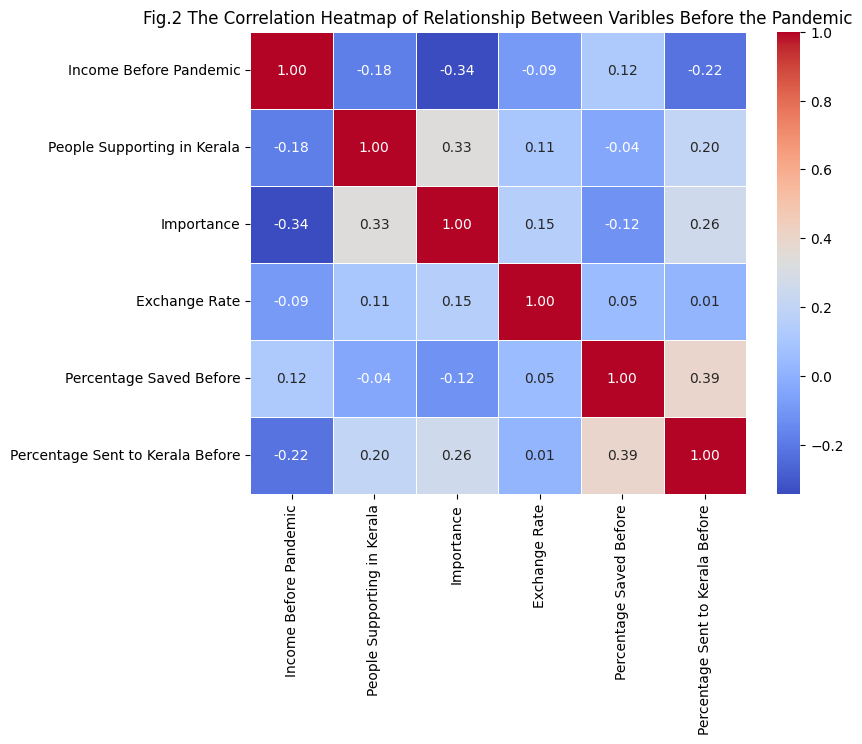

In [207]:
before_corr_matrix = before_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(before_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title("Fig.2 The Correlation Heatmap of Relationship Between Varibles Before the Pandemic")
plt.show()

So let's break down what this actually means. df.corr() calculates the Pearson Correlation Coefficient (r) between every single variable. This is a measure of how strong the linear correlation between two variables is

This r will always be a value between 1 and -1. If r is positive, then if one variable increases the other variable increases. If r is negative, if one variable increases the other variable decreases.

The closer r is to 1, or -1, then the stronger the correlation. The closer to 0, the weaker the relationship.

From these variables, we can see that most of the relationships are rather weak.

People supported in Kerala, and importance of sending money back to family in Kerala do not seem like strong indicators of perecntage of income saved before the pandemic.

However, the three variables seem significantly stronger for percentage of income sent to Kerala.

Exchange rate doesn't seem indicative for either of them.

Let's produce the same correlation graph for during the pandemic.

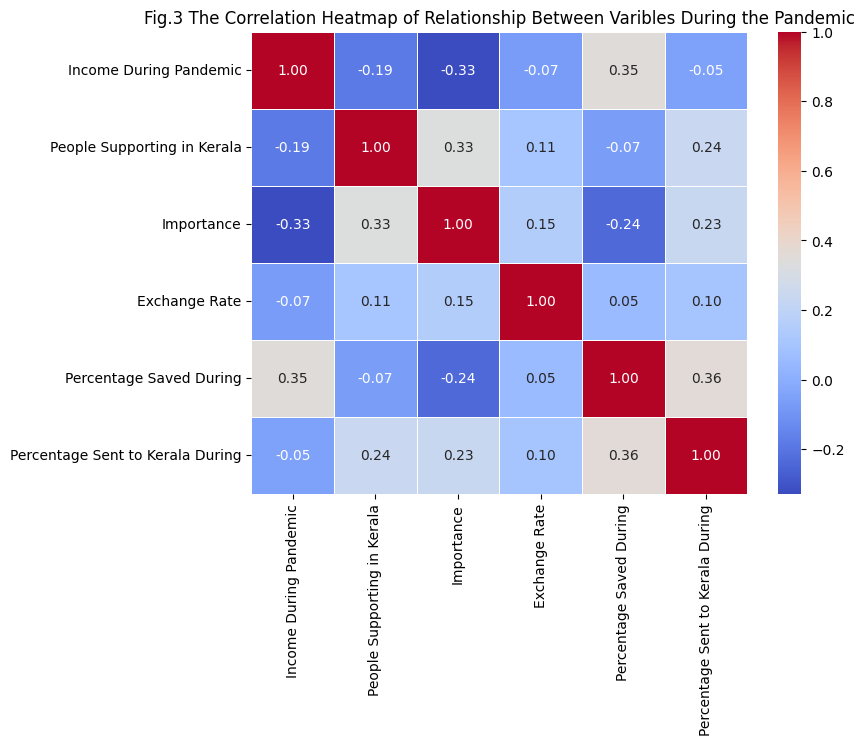

In [208]:
during_corr_matrix = during_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(during_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title("Fig.3 The Correlation Heatmap of Relationship Between Varibles During the Pandemic")
plt.show()

The realtionship between these variables are also weak. This is pretty odd– I mean the Importance of Sending Money back home or the People they support back home should have more of an impact. Let's try visualizing the data with scatterplots in order to understand this more.

Slope: -0.0006403802068772716
R-squared: 0.05
P value: 0.01


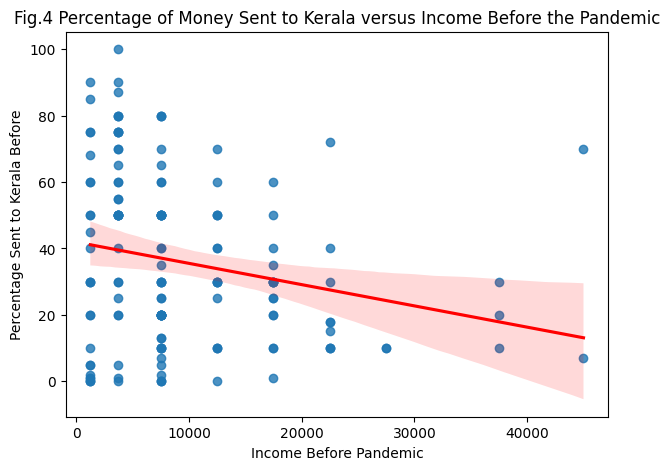

In [232]:
plt.figure(figsize=(7, 5))
sns.regplot(x='Income Before Pandemic', y='Percentage Sent to Kerala Before', data=before_df, line_kws={'color': 'red'})
plt.title("Fig.4 Percentage of Money Sent to Kerala versus Income Before the Pandemic")

slope, intercept, r_value, p_value, _ = linregress(before_df['Income Before Pandemic'], before_df['Percentage Sent to Kerala Before'])
print(f"Slope: {slope}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P value: {p_value:.2f}")
plt.show()

Slope: -0.0001480516606589445
R-squared: 0.00
P value: 0.55


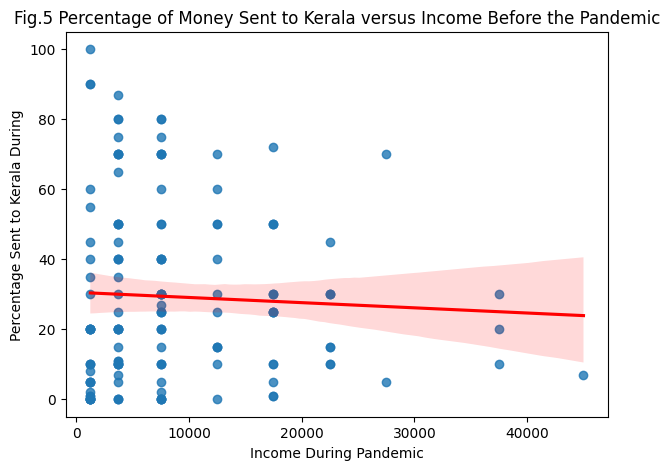

In [233]:
plt.figure(figsize=(7, 5))
sns.regplot(x='Income During Pandemic', y='Percentage Sent to Kerala During', data=during_df, line_kws={'color': 'red'})
plt.title("Fig.5 Percentage of Money Sent to Kerala versus Income Before the Pandemic")
slope, intercept, r_value, p_value, _ = linregress(during_df['Income During Pandemic'], during_df['Percentage Sent to Kerala During'])
print(f"Slope: {slope}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P value: {p_value:.2f}")
plt.show()

For each of these graphs we also calculated R^2 and the p-value.


1.   The slope represents the slope of the regression line shown on the graph

2.   The R^2 value tells you how well the regression line fits the data. It goes from 0 to 1– 0 is worse and 1 is better.
3.   The p-value indicates whether the regression relationship indicated by the graph is strong or weak. If p-value < 0.05, then the relationship is significant. Otherwise, the relationship is insignificant.


It seems income is weakly correlected to percentage saved. Before the pandemic we could say the correlation was stastically significant, but behvaior during the pandemic isn't stastically significant from the p-value.

Finally, the slopes of the graph shows there is no significant change between each of them.


Slope: 6.882222985909951
R-squared: 0.07
P value: 0.00


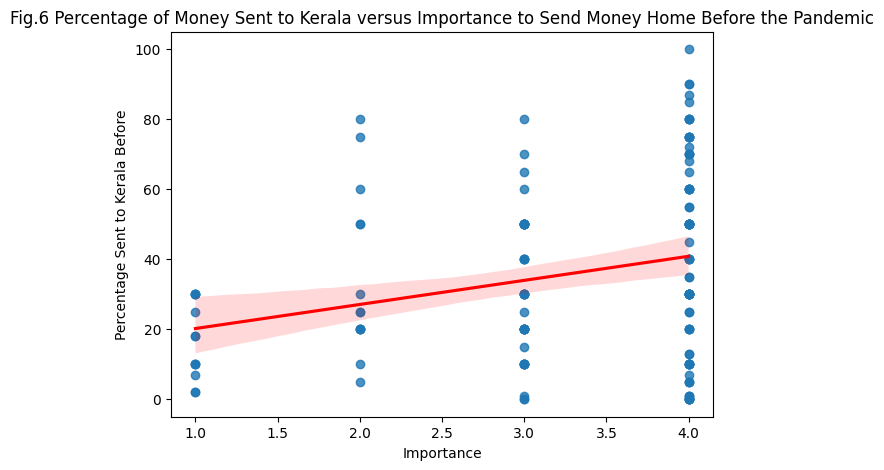

In [234]:
plt.figure(figsize=(7, 5))
sns.regplot(x='Importance', y='Percentage Sent to Kerala Before', data=before_df, line_kws={'color': 'red'})
plt.title("Fig.6 Percentage of Money Sent to Kerala versus Importance to Send Money Home Before the Pandemic")
slope, intercept, r_value, p_value, _ = linregress(before_df['Importance'], before_df['Percentage Sent to Kerala Before'])
print(f"Slope: {slope}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P value: {p_value:.2f}")
plt.show()

Slope: 6.158230644606991
R-squared: 0.05
P value: 0.00


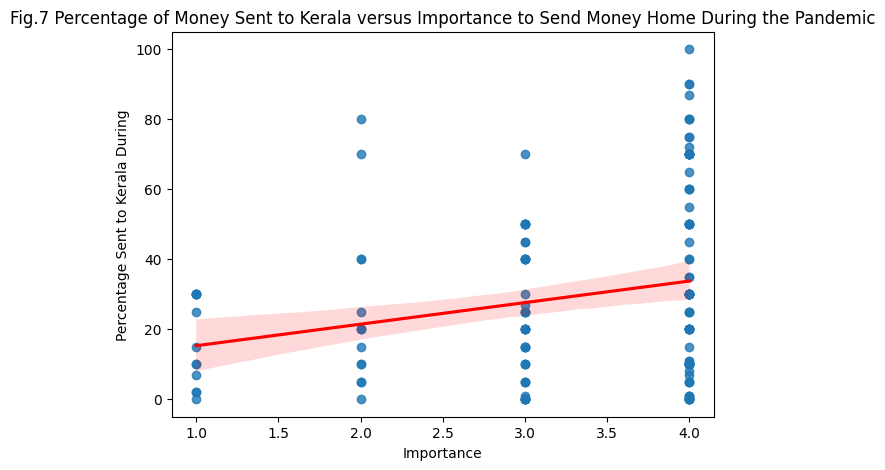

In [235]:
plt.figure(figsize=(7, 5))
sns.regplot(x='Importance', y='Percentage Sent to Kerala During', data=during_df, line_kws={'color': 'red'})
plt.title("Fig.7 Percentage of Money Sent to Kerala versus Importance to Send Money Home During the Pandemic")
slope, intercept, r_value, p_value, _ = linregress(during_df['Importance'], during_df['Percentage Sent to Kerala During'])
print(f"Slope: {slope}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P value: {p_value:.2f}")
plt.show()

There is high variability in both, giving us weak linear correlations. However the -value ensures that there is a strong positive correlation between the variables. The low R^2 and R values just say that correlation isn't linear.

Notice that the slope in Figure 7 is slightly less than the slope in Figure 6. Its a minute difference– it tell us that before the Pandemic, an increase in degree of importance corresponds to about 6.8% increase in percentage sent to Kerala. However, during the pandemic, an increase in degree of importance only gives us about 6.15% increaseing percentage sent to Kerala.

This is an almost insignificant differnce– but it seems to indicate that even though higher importance to send money home corresponds to higher percentage of money sent to Kerala, during the pandmic only a smaller proportion of money could be sent home.

However the graphs above are misleading in a way– as explained below:

## Misleading Data Piece

Check out Figure 4 and Figure 6– these are our misleading data pieces. Each has a caption.

Explanation: These graphs are misleading, primarily because of the slope and regression line. When we see the slope of Fgiure 6, we are inclined to think that Importance has a stronger impact on percentage of money sent to Kerala as opposed to income. But this comparison isn't fair, becuase we are looking at unnormalized data.

Notice that Income ranges from 1250 to 45000, while Importance ranges from 1 to 4. When the data is in-between different ranges, regression analysis gives more importance to the data with larger values than smaller values– a shift in income is expected to change percentage of money sent to Kerala as opposed to importance.

## Data Anlysis after Normalization

In [240]:
normalized_before_df = before_df
normalized_before_df["Income Before Pandemic"] = (before_df["Income Before Pandemic"] - before_df["Income Before Pandemic"].mean()) / before_df["Income Before Pandemic"].std()
normalized_before_df["Importance"] = (before_df["Importance"] - before_df["Importance"].mean()) / before_df["Importance"].std()
normalized_before_df['Percentage Sent to Kerala Before'] = (before_df['Percentage Sent to Kerala Before'] - before_df['Percentage Sent to Kerala Before'].mean()) / before_df['Percentage Sent to Kerala Before'].std()

<ipython-input-240-35779334e618>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized_before_df["Income Before Pandemic"] = (before_df["Income Before Pandemic"] - before_df["Income Before Pandemic"].mean()) / before_df["Income Before Pandemic"].std()
<ipython-input-240-35779334e618>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized_before_df["Importance"] = (before_df["Importance"] - before_df["Importance"].mean()) / before_df["Importance"].std()
<ipython-input-240-35779334e618>:4: SettingW

In [242]:
normalized_during_df = during_df
normalized_during_df["Income During Pandemic"] = (during_df["Income During Pandemic"] - during_df["Income During Pandemic"].mean()) / during_df["Income During Pandemic"].std()
normalized_during_df["Importance"] = (during_df["Importance"] - during_df["Importance"].mean()) / during_df["Importance"].std()
normalized_during_df['Percentage Sent to Kerala During'] = (during_df['Percentage Sent to Kerala During'] - during_df['Percentage Sent to Kerala During'].mean()) / during_df['Percentage Sent to Kerala During'].std()

<ipython-input-242-49f27783662d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized_during_df["Income During Pandemic"] = (during_df["Income During Pandemic"] - during_df["Income During Pandemic"].mean()) / during_df["Income During Pandemic"].std()
<ipython-input-242-49f27783662d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized_during_df["Importance"] = (during_df["Importance"] - during_df["Importance"].mean()) / during_df["Importance"].std()
<ipython-input-242-49f27783662d>:4: SettingW

Here, we emplpoy a standrdization technique called z-score strandardization. For every data point, we subtract it by the mean of all data points, and then divide them by the standard deviation.

Slope: -0.21792590840019488
R-squared: 0.05
P value: 0.01


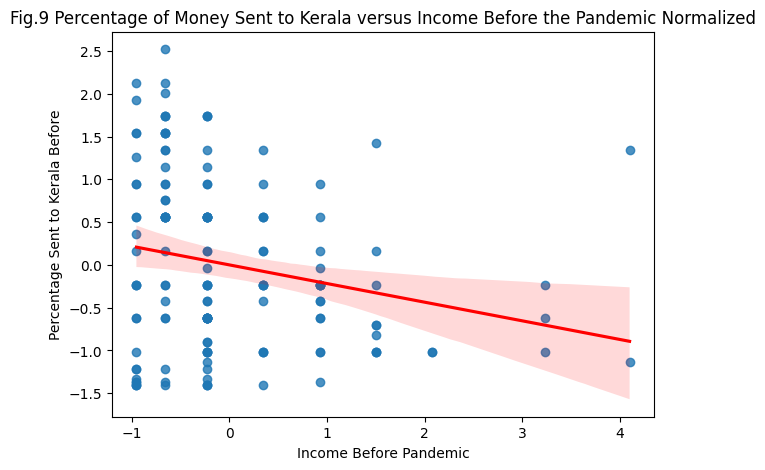

In [252]:
plt.figure(figsize=(7, 5))
sns.regplot(x='Income Before Pandemic', y='Percentage Sent to Kerala Before', data=normalized_before_df, line_kws={'color': 'red'})
plt.title("Fig.8 Percentage of Money Sent to Kerala versus Income Before the Pandemic Normalized")

slope, intercept, r_value, p_value, _ = linregress(normalized_before_df['Income Before Pandemic'], normalized_before_df['Percentage Sent to Kerala Before'])
print(f"Slope: {slope}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P value: {p_value:.2f}")
plt.show()

Slope: -0.048821726391183776
R-squared: 0.00
P value: 0.55


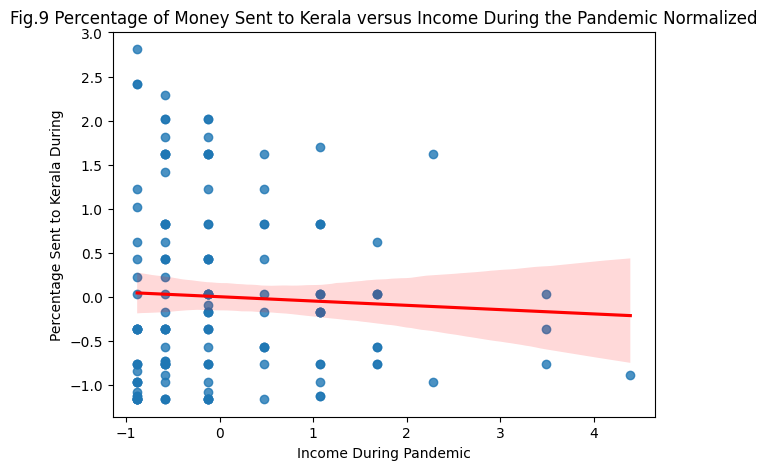

In [253]:
plt.figure(figsize=(7, 5))
sns.regplot(x='Income During Pandemic', y='Percentage Sent to Kerala During', data=normalized_during_df, line_kws={'color': 'red'})
plt.title("Fig.9 Percentage of Money Sent to Kerala versus Income During the Pandemic Normalized")

slope, intercept, r_value, p_value, _ = linregress(normalized_during_df['Income During Pandemic'], normalized_during_df['Percentage Sent to Kerala During'])
print(f"Slope: {slope}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P value: {p_value:.2f}")
plt.show()

From standardization, notice that the R^2 and p-value don't change that much– these are more or less normalization invariate. They don't change much with normalization.

But now we can be more confident that as the income increases, percentage sent to Kerala generally decreases.

But take note of the slope in Fig. 9

Slope: 0.25813949034774974
R-squared: 0.07
P value: 0.00


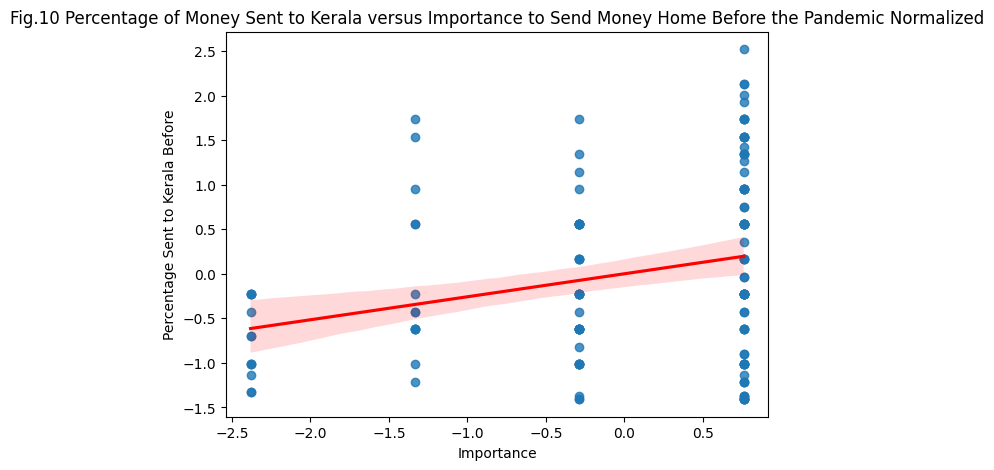

In [254]:
plt.figure(figsize=(7, 5))
sns.regplot(x='Importance', y='Percentage Sent to Kerala Before', data=normalized_before_df, line_kws={'color': 'red'})
plt.title("Fig.10 Percentage of Money Sent to Kerala versus Importance to Send Money Home Before the Pandemic Normalized")
slope, intercept, r_value, p_value, _ = linregress(normalized_before_df['Importance'], normalized_before_df['Percentage Sent to Kerala Before'])
print(f"Slope: {slope}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P value: {p_value:.2f}")
plt.show()

Slope: 0.23360700011941574
R-squared: 0.05
P value: 0.00


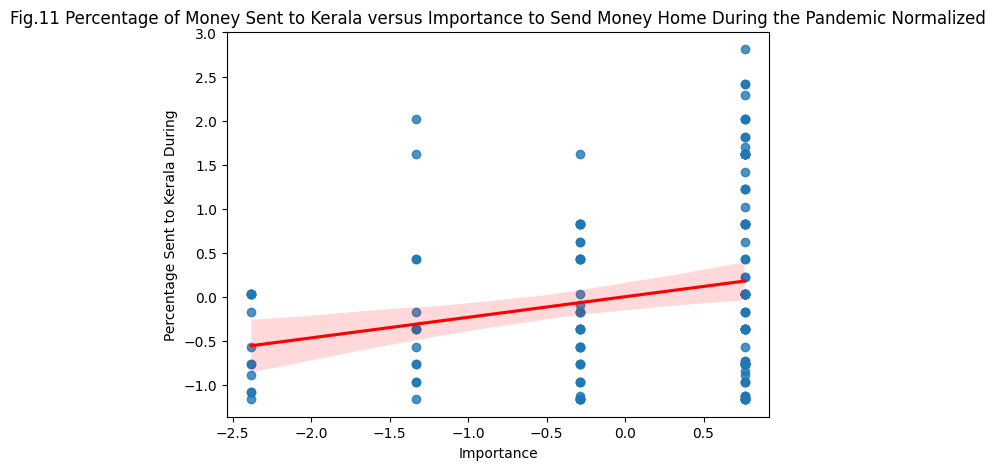

In [255]:
plt.figure(figsize=(7, 5))
sns.regplot(x='Importance', y='Percentage Sent to Kerala During', data=normalized_during_df, line_kws={'color': 'red'})
plt.title("Fig.11 Percentage of Money Sent to Kerala versus Importance to Send Money Home During the Pandemic Normalized")
slope, intercept, r_value, p_value, _ = linregress(normalized_during_df['Importance'], normalized_during_df['Percentage Sent to Kerala During'])
print(f"Slope: {slope}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P value: {p_value:.2f}")
plt.show()

Now between Figure 11 and 12, there isn't much difference in shape– the only thing that changes is the slope. In fact, the slope here is much harder to interpret due to the changed units. However– these can be our communicating data pieces because we can now compare them.

## Communicating Data Piece

Look at Figure 8 and Figure 10– both with captions

Explanation: Althopugh it is harder to udnerstand what the slope means, we can now compare the slopes in figure 8 and 10 properly. In our misleading piece, we that that income level doesn't impact percentage of money sent to Kerala as much.

However, in the two data pieces above the slope for income vs percentage of money sent to Kerala is -0.21, while slope for importance vs percentage of money sent to Kerala is 0.25.

Ignoring which is positive and negative aside, this shows that income and importance had a similar impact upon percentage of income sent to Kerala before the pandemic. There isn't much of a difference between 0.21 and 0.25– they seemed to change percentage of money sent to Kerala by a similar value. One led to a decrease and the other an increase.

## Why you Shouldn't Trust this Data



Naturally, many of you would think that communicating data piece should tell you everything– but you should actually view it as a misleading data piece. There are several reasons for this:



1.   Wikipedia estimates that there are about 1 million Keralites in Abu Dhabi. This data set was analyzed on 150 people– it is most definitely not a representative sample. We just don't have enough information to get reliable results.

2.   We just assumed every relationship is linear– which isn't necessarily true. Howver we had low R^2 and r values. While we have a egneral idea of wether the trend is postive or not, and whether a correlation exists, we can also be sure the relationship isn't linear. In this specific case, every graph had a huge varaince so almost any relationship would give us low correlation values. However, that is another weakness here.


3.   We started with 205 responses, and due to inccorect responses, it got whittled down to 150. This means that the survey was hard for people to understand. I mean, no one can give exact answers on percentage saved or percentage sent to Kerala. These are all estimates, and it isn't really viable. People could have lied to make themselves feel better.


These are some reasons as to why this dataset isn't good– but it gives us just a bit more insight into the population



## Extra Reading

If you guys went through all this, and are interested enough to read more, then there some more stuff you can check out.

First of all is the Appendices, also on the GitHub. You can check it out and see what the survey looks like, and an aggregation of the results.

Based on this dataset, I wrote a paper in High School– doing a more economic analysis on this with an interesting econmic theory. It's less focused on data manipulation, and more of a qualitative analysis. It's also linked on the GitHub, so check it out!